In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # mean and std for three channels, (data = data-mean) / std

batch_size = 5

trainset = torchvision.datasets.CIFAR10(
    root='.\data', 
    train=True, 
    download=True, 
    transform=transform)

trainloader = torch.utils.data.DataLoader(
    trainset, 
    batch_size=batch_size, 
    shuffle=True,
    num_workers=4 #using the number of cores in CPU. i5-8250 is 4 cores 8 threads
)

valset = torchvision.datasets.CIFAR10(
    root='.\data', 
    train=False, 
    download=True, 
    transform=transform)

valloader = torch.utils.data.DataLoader(
    valset, 
    batch_size=batch_size, 
    shuffle=True,
    num_workers=4 #using the number of cores in CPU. i5-8250 is 4 cores 8 threads
)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


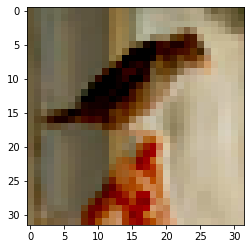

In [3]:
import matplotlib.pyplot as plt
import numpy as np

dataiter = iter(valloader)
images, labels = dataiter.next()

plt.imshow(np.transpose(images[0], (1,2,0)))
plt.show()

In [4]:
print(images[0][0].shape)

torch.Size([32, 32])


In [5]:
import torch.nn as nn
import torch.nn.functional as F

class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool2 = nn.MaxPool2d(2,2)
        self.dense1 = nn.Linear(16 * 5 * 5, 120)
        self.dense2 = nn.Linear(120, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = torch.flatten(x,1)
        x = F.relu(self.dense1(x))
        x = torch.softmax(self.dense2(x), dim=1)
        #x = self.dense2(x)
        #print(x.shape)
        return x

net = ConvNet()

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [7]:
from tqdm import trange
from tqdm import tqdm

In [8]:
epoch_num = 2
for epoch in range(epoch_num):
    running_loss = 0.0
    i = 0
    with tqdm(trainloader, unit="batch") as tepoch:
        for data in tepoch:
            i = i + 1
            tepoch.set_description(f"Epock {epoch + 1}")
            input, labels = data

            optimizer.zero_grad()

            outputs = net(input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            tepoch.set_postfix(loss=running_loss/i)


Epock 2:  32%|███▏      | 3171/10000 [00:41<01:29, 76.21batch/s, loss=2.13] 


KeyboardInterrupt: 